# **Segmentación y localización de estructuras retinianas en imágenes de fondo de ojo mediante redes neuronales Attention U-Net**

Alejandra Arciniegas Marin$^1$, Andrés Felipe Riaño$^1$, William Galeano$^1$

Instituto de Física, Universidad de Antioquia U de A, calle 70 No. 52-21, Medellìn, Colombia$^1$







---

# ***Resumen***






Este informe describe la implementación de un modelo basado en Attention U-Net para la segmentación de estructuras en imágenes médicas, abarcando las etapas de preprocesamiento, entrenamiento y evaluación. El objetivo fue mejorar el enfoque en regiones relevantes mediante el uso de esta arquitectura avanzada. Para ello, se definieron parámetros clave, como el tamaño de imagen (400, 400) y una tasa de aprendizaje de 1e-4, dividiendo los datos en entrenamiento (70%), validación (15%) y prueba (15%).

Se aplicaron técnicas de aumento de datos (rotaciones, desplazamientos y reflejo horizontal) para mejorar la capacidad de generalización, y se emplearon generadores personalizados para una eficiente carga de datos durante el entrenamiento. El modelo se configuró con una entrada de (400, 400, 3) y salida binaria, utilizando el optimizador Adam y una función de pérdida ponderada. Fue entrenado durante 180 épocas, incorporando callbacks para ajustar dinámicamente la tasa de aprendizaje.

Los resultados que se presentaran apartir de balance de clases, han sido evaluados mediante gráficos de métricas, curva ROC y matriz de confusión. Las predicciones del modelo fueron comparadas con máscaras reales para validar su desempeño.

Gracias a un pipeline de procesamiento y entrenamiento, el modelo Attention U-Net logró una segmentación , mostrando aplicabilidad para aplicaciones en diagnóstico médico.

---
# ***Introducción***



La retinografía es una técnica diagnóstica fundamental en oftalmología, ya que permite obtener imágenes detalladas del fondo del ojo para la detección, monitoreo y seguimiento de diversas enfermedades oculares. Entre las patologías más relevantes que pueden identificarse mediante esta técnica se encuentran la retinopatía diabética, la degeneración macular y el glaucoma, todas ellas con un alto impacto en la salud visual de la población mundial [1][2][3][4]. Gracias a la captura de fotografías de la retina mediante un retinógrafo especializado, los especialistas pueden evaluar cambios estructurales en el tejido ocular y tomar decisiones clínicas oportunas [4][5].

En particular, la retinopatía diabética representa una de las principales causas de ceguera en adultos en países desarrollados y es una complicación frecuente de la diabetes mellitus. Esta afección afecta la microvasculatura de la retina, provocando daño progresivo que, de no tratarse a tiempo, puede derivar en pérdida severa de visión [4][6]. Se estima que aproximadamente el 30% de los pacientes con diabetes desarrollan algún grado de retinopatía diabética [4][6]. La enfermedad avanza en distintas etapas, desde manifestaciones iniciales con alteraciones leves hasta fases más graves, caracterizadas por la formación de neovasos, hemorragias y desprendimiento de retina, lo que puede comprometer irreversiblemente la visión [4][5][6].

El diagnóstico temprano es un factor clave para prevenir la progresión de la retinopatía diabética y mitigar sus efectos a largo plazo. Sin embargo, la detección manual de alteraciones en imágenes retinianas puede ser un proceso complejo, subjetivo y demandante en términos de tiempo y recursos. En este contexto, la inteligencia artificial (IA) ha emergido como una herramienta innovadora en el análisis automatizado de retinografías. La implementación de sistemas de IA permite la detección rápida y precisa de signos tempranos de la enfermedad, optimizando el proceso diagnóstico y facilitando la toma de decisiones clínicas [4][6].

Este estudio se centra en el uso del Indian Diabetic Retinopathy Image Dataset (IDRiD) [1], un conjunto de datos ampliamente utilizado en la investigación de retinopatía diabética. Se plantea la aplicación de técnicas avanzadas de segmentación de imágenes mediante redes neuronales convolucionales, específicamente a través de la arquitectura Attention U-Net. A diferencia de otros enfoques convencionales, esta estrategia incorpora mecanismos de atención que mejoran la precisión en la identificación de características sutiles dentro de las imágenes retinianas, como microaneurismas, exudados y hemorragias [7].

El empleo de redes neuronales basadas en Attention U-Net en este estudio tiene como objetivo mejorar la segmentación y localización de estructuras críticas en la retina, contribuyendo a un análisis más preciso y automatizado de las retinografías. Con ello, se busca potenciar el papel de la inteligencia artificial en el diagnóstico y manejo de la retinopatía diabética, abriendo nuevas posibilidades para una intervención temprana y más efectiva. Este avance tecnológico no solo representa una contribución significativa en el ámbito de la oftalmología, sino que también ofrece una alternativa prometedora para reducir el impacto de esta enfermedad en la calidad de vida de los pacientes.





---

# ***Metodología***

En este estudio, se utilizó el "Indian Diabetic Retinopathy Image Dataset (IDRiD)", compuesto por tres secciones distintas: Localización, Segmentación y Grado de enfermedad. Nos enfocamos exclusivamente en las secciones de Localización y Segmentación.

El dataset de Localización consta de 516 imágenes de tamaño 4288 x 2848 píxeles, de las cuales 413 son de entrenamiento y 103 de prueba. Además, incluye 4 archivos CSV: dos archivos contienen las coordenadas del centro del disco óptico, uno para el entrenamiento y otro para la prueba; los otros dos archivos contienen las coordenadas del centro de la fóvea, también divididos en entrenamiento y prueba. Para simplificar el tratamiento de los datos, se mezclaron las imágenes de entrenamiento con las de prueba y se combinaron los 4 archivos CSV en solo dos: uno para las coordenadas del centro del disco óptico y otro para las coordenadas del centro de la fóvea.

El dataset de Segmentación tiene 81 imágenes de tamaño 4288 x 2848, con 54 imágenes de entrenamiento y 27 de prueba. También cuenta con 10 grupos de máscaras del mismo tamaño, que incluyen 5 conjuntos de máscaras de entrenamiento y 5 conjuntos de máscaras de prueba. Estas máscaras corresponden a exudados duros, exudados suaves, microaneurismas, hemorragias y disco óptico. Al igual que en el otro dataset, se mezclaron las imágenes de entrenamiento y prueba, y se reagruparon las máscaras de entrenamiento y prueba para que hubiese tan solo 5 grupos de imágenes. Adicionalmente, como algunas imágenes no tenían máscara de alguno de los grupos, se rellenaron esos vacíos con imágenes de fondo negro del mismo tamaño, asumiendo que esta característica no formaba parte de la retinografía.

El desarrollo del proyecto se estructura en dos etapas principales:

1. Entrenamiento de una red neuronal para la segmentación de exudados duros, exudados blandos, microaneurismas, hemorragias y el disco óptico.
2. Entrenamiento de una red neuronal para la localización del centro del disco óptico y del centro de la fóvea.

A continuación, se detallan las características comunes de ambas etapas del proyecto. En cada caso, se implementará una red neuronal convolucional diseñada para el reconocimiento de objetos en imágenes. Estas redes serán entrenadas utilizando máscaras que indican la ubicación de los objetos retinianos de interés, permitiendo así su identificación y localización en imágenes de fondo de ojo. La arquitectura seleccionada para ambas redes es la Attention U-Net, la cual hemos desarrollado desde cero, sin utilizar ningún modelo preentrenado. Además, se empleará una tasa de aprendizaje variable utilizando la estrategia PolyScheduler para optimizar el proceso de entrenamiento de las redes. También se aplicará la técnica de aumento de datos para mejorar la generalización de los modelos mediante la creación de variaciones adicionales de las imágenes de entrenamiento.
Adicionalmente, para hacer la evaluación de ambos modelos, se utilizarán curvas ROC y curvas PR.
Para efectuar estas tareas se empleó el modelo de lenguaje asistente ChatGPT de Open AI [8].

## **Descripción general del procedimiento para el entrenamiento de las redes neuronales**



1. **Preparación de Datos:**

   Se inicia el procedimiento con la configuración de parámetros clave, que incluyen el tamaño de las imágenes, las rutas de los datos (imágenes y máscaras), y la tasa de aprendizaje. Posteriormente, se procede a cargar y procesar las imágenes junto con sus respectivas máscaras, con el objetivo de segmentar diferentes estructuras o patologías en imágenes médicas.

2. **División del Conjunto de Datos:**

   Con el fin de garantizar un entrenamiento adecuado y una evaluación equitativa, se lleva a cabo la división del conjunto de datos en tres segmentos:
   - 70% destinado al entrenamiento
   - 15% reservado para validación
   - 15% destinado a prueba

   Esta división se realiza mediante la función `train_test_split` de Scikit-Learn.

3. **Aumento de Datos (Data Augmentation):**

   Para optimizar la generalización del modelo, se implementa la técnica de aumento de datos en las imágenes de entrada y en las máscaras de segmentación. Se utilizan transformaciones tales como:

   - Rotación aleatoria
   - Desplazamiento en ancho y alto
   - Transformaciones de corte y zoom
   - Volteo horizontal

   Estas operaciones permiten simular variaciones en las imágenes originales y mitigar el riesgo de sobreajuste.

4. **Generación de Datos por Lotes (Batch Generators):**

   Se desarrollan generadores de datos que facilitan la alimentación de la red neuronal en lotes pequeños, lo cual contribuye a reducir el consumo de memoria y permite un entrenamiento más eficiente del modelo. Para este propósito, se emplean `ImageDataGenerator` y `DataGenerator`.

5. **Definición del Modelo de Segmentación:**

   Se implementa un modelo basado en Attention U-Net, el cual constituye una mejora sobre la arquitectura original de U-Net al incorporar mecanismos de atención que se centran en las regiones relevantes de la imagen. Este modelo se configura con las siguientes especificaciones:

   - Tamaño de entrada: (N, 320, 320, 3) y (N, 320, 320, 1) para N imágenes y N máscaras de segmentación del disco óptico; (N, 400, 400, 3) y (N, 400, 400, 1) para N imágenes y N máscaras de segmentación de exudados duros, exudados blandos, microaneurismas y hemorragias; (N, 224, 224, 3) y (N, 224, 224, 1) para N imágenes y N máscaras de segmentación del disco óptico y la fóvea para su posterior localización.
   - Número de canales de salida: 1 (para segmentación binaria)
   - Funciones de pérdida y métricas: `weighted_loss`, `accuracy` y `dice_coefficient`

6. **Compilación y Entrenamiento del Modelo:**

   El modelo se compila utilizando el optimizador Adam y se entrena durante 180 épocas, tomando como fuente de datos `train_generator` y validación en `x_val`, `y_val`. Se incluyen callbacks para ajustar la tasa de aprendizaje y supervisar el desempeño del modelo.

7. **Evaluación del Modelo:**

   Una vez concluido el entrenamiento, se procede a evaluar el modelo en el conjunto de prueba (`x_test`, `y_test`), obteniendo métricas tales como:

   - Pérdida en el conjunto de prueba
   - Precisión del modelo

8. **Guardado del Modelo:**

   Se almacena el modelo entrenado en un archivo con extensión .h5 para su uso posterior en predicciones o en despliegue en aplicaciones médicas.

9. **Visualización y Análisis de Resultados:**

   Finalmente, se generan gráficos y métricas clave para realizar un análisis del desempeño del modelo, que incluye:

   - Curvas de entrenamiento (pérdida y precisión)
   - Curva ROC para la evaluación del rendimiento del modelo
   - Matriz de confusión para visualizar los errores de clasificación.




## **Red U-Net y U-Net con Atención**

### **¿Qué es U-Net?**

U-Net es una arquitectura de red neuronal convolucional diseñada específicamente para la segmentación de imágenes biomédicas. Introducido en 2015 por el equipo de Olaf Ronneberger, U-Net tenía como objetivo crear una red de alto rendimiento que pudiera funcionar con datos de entrenamiento limitados, abordando así el desafío de la escasez de imágenes anotadas en el campo médico [9].

Figura 1. *Esquema de la arquitectura U-Net.* Fuente: [10]
![Figura 1](https://viso.ai/wp-content/uploads/2024/04/unet-process.png)

El modelo presenta una estructura distintiva en forma de U, compuesta por dos partes principales: la ruta de contracción (codificador) y la ruta de expansión (decodificador). La ruta de codificación captura el contexto y la ruta de decodificación permite una localización precisa [9].

**Ruta de contracción (codificación):** Cuando la red "codifica", está extrayendo características relevantes de la imagen, como texturas, bordes y formas, y reduciendo la resolución para encontrar patrones globales en lugar de enfocarse en detalles superficiales, capturando el "significado" abstracto de la imagen. La codificación está compuesta por:

- Capas convolucionales: las capas convolucionales son los componentes principales de la trayectoria de contracción. En el modelo propuesto originalmente, cada bloque consta de dos capas convolucionales consecutivas de 3x3 seguidas de una función de activación de unidad lineal rectificada (ReLU). Al apilar múltiples capas convolucionales, U-Net aprende características cada vez más complejas [9].
- Funciones de activación: después de cada operación de convolución, se aplica una función de activación ReLU. El papel de ReLU en este caso es crucial, ya que introduce no linealidades en el sistema, lo que permite aprender patrones más complejos en los datos que no son posibles con transformaciones solo lineales [9].
- Max Pooling: después de las capas convolucionales, se utiliza una operación de agrupamiento máximo de 2×2 con paso 2. Este paso reduce las dimensiones espaciales a la mitad. Sin embargo, captura información abstracta (que hace que el modelo sea invariable a pequeños cambios y distorsiones) [9].
- Duplicación de características: después de cada paso de agrupación máxima, la capa convolucional posterior duplica la cantidad de filtros utilizados. Por ejemplo, si una capa comienza con 64 canales de características, tendrá 128 canales después de las siguientes operaciones de agrupación y convolución. Al duplicar la cantidad de canales de características, la red puede mantener o incluso aumentar su capacidad para representar información a pesar de la reducción en la resolución espacial. Esto es crucial porque el riesgo de perder detalles importantes aumenta a medida que se reduce el tamaño de la imagen [10].

A medida que avanzas por las capas del codificador, la resolución de la imagen disminuye, pero la representación interna de las características se vuelve más rica.

**Ruta de expansión (decodificación):** Cuando la red "decodifica", está recuperando la resolución original de la imagen paso a paso, refinando los detalles para decidir con precisión qué clase corresponde a cada píxel y combinando características globales y locales para obtener segmentaciones detalladas. Cada bloque incluye:
- Muestreo ascendente (Up-sampling) del mapa de características para aumentar el tamaño de la imagen [9].
- Una convolución 2×2 para reducir a la mitad el número de canales de características [9].
- Dos convoluciones 3×3 seguidas de activación de ReLU [9].

U-Net utiliza conexiones de salto para fusionar mapas de características del codificador y el decodificador en la misma resolución. Esto combina información detallada de bajo nivel con información contextual de alto nivel, mejorando la precisión y la reconstrucción. Las conexiones ayudan a recuperar detalles espaciales perdidos durante la agrupación. Finalmente, una convolución 1×1 asigna las características a las clases deseadas para la segmentación. [9].

### **Attention U-Net**

Figura 2. *Esquema de la arquitectura Attention U-Net.* Fuente: [11]
![Figura 2](https://www.researchgate.net/publication/349831785/figure/fig3/AS:11431281211955752@1702512046887/U-Net-with-the-attention-mechanisms-structure-34-The-encoder-performs-4-downsampling.tif)

Es una variante que integra mecanismos de atención en la arquitectura estándar de U-Net. Estos mecanismos son las compuertas de atención. Una compuerta de atención es una operación matemática que filtra la información entrante asignándole un peso (un valor entre 0 y 1). Este peso indica cuánto de esa información debe ser "dejado pasar".

**Funcionamiento de las compuertas de atención:** Supongamos que tenemos x características del codificador, que es información espacial rica (por ejemplo, contornos o texturas); y g características del decodificador, la cual es información más abstracta (objetos o patrones globales). A ambas entradas se les aplica una reducción de dimensión mediante una convolución 2D de kernel (1,1). Se combinan los dos resultados anteriores sumando elemento a elemento, lo cual combina las dos características y crea una representación conjunta. Al resultado anterior se le aplica una función de activación ReLU para introducir no linealidad. A la información anterior se le aplica nuevamente una convolución 2D de kernel (1, 1) y se le aplica una función sigmoide. Con esto se crea un mapa de atención, cuya función es representar qué partes de x son importantes. Finalmente, se multiplica el mapa de atención por la entrada original x. Las regiones relevantes se mantienen fuertes (valores cercanos a 1), mientras que las irrelevantes se suprimen (valores cercanos a 0) [12]. Las compuertas de atención aprenden a centrarse en las regiones relevantes de los mapas de características del codificador asignando pesos en función del contexto. Mejoran el rendimiento del modelo y generan límites de segmentación más precisos [9].

En la Figura 2 se presenta un esquema que ilustra el funcionamiento de la arquitectura Attention U-Net. Este esquema puede explicarse de la siguiente manera:

- **Entrada (Input Image):** La imagen de entrada que se procesará (como una imagen médica o una imagen satelital).

- **Codificación:** Se observa una serie de **Backbone Conv Blocks** (bloques convolucionales del codificador). Cada bloque extrae características de la imagen. Las flechas azules hacia abajo (Max-pooling) indican una reducción en la resolución espacial, mientras aumentan los canales de características.

- **Cuello (zona central):** Conecta el codificador y el decodificador, conteniendo el bloque convolucional de características más profundas.

- **Decodificación (parte derecha):** Las flechas hacia arriba (Upsampling) indican un aumento progresivo de la resolución. Los **Attention Gates** (compuertas de atención) filtran las características relevantes provenientes de los bloques del codificador. Los **Conv Blocks** refinan la información para reconstruir la imagen o generar la máscara.

- **Bloques de Atención (Attention Gates):** Indicados por los círculos en naranja. Sirven para comparar la información del codificador y del decodificador, ponderando solo las características importantes.

- **Conexiones de salto (Skip Connections):** Las líneas horizontales punteadas conectan directamente las características del codificador con el decodificador después de pasar por el bloque de atención. Mantienen detalles espaciales importantes.

- **Salida (Output Image):** La imagen de saluda representa una **máscara de segmentación** o resultado procesado, ajustado a la tarea.




## **Tasa de Aprendizaje Variable y Poly Scheduler**

El aprendizaje variable permite ajustar dinámicamente la tasa de aprendizaje durante el entrenamiento, facilitando una mejor convergencia y generalización.

### **Mecanismo**
- **Inicio con alta tasa de aprendizaje:** Permite captar patrones generales rápidamente.
- **Reducción progresiva:** Facilita un ajuste fino del modelo para mejorar la precisión.

### **Beneficios**

- **Convergencia Mejorada:** Mediante la adaptación de la tasa de aprendizaje, los modelos pueden lograr una convergencia más rápida, reduciendo el tiempo de entrenamiento sin sacrificar precisión [13].

- **Mejor Generalización:** El aprendizaje variable ayuda a evitar el sobreajuste, permitiendo a los modelos aprender características robustas a partir de conjuntos de datos diversos sin volverse demasiado especializados [14].

- **Adaptación Dinámica:** A medida que nuevos datos están disponibles o que la distribución de datos subyacente cambia, el aprendizaje variable permite que los modelos se ajusten en consecuencia, manteniendo su relevancia y efectividad [13].

### **Poly Scheduler**
Poly Scheduler es una estrategia avanzada de ajuste dinámico de hiperparámetros que permite optimizar el entrenamiento de redes neuronales. Funciona asignando recursos computacionales y modificando la tasa de aprendizaje en función de métricas en tiempo real. Está dada por la ecuación 1.

**Ventajas:**
- **Eficiencia computacional:** Optimiza el uso de GPUs y reduce tiempos de entrenamiento [15].
- **Escalabilidad:** Se adapta a diferentes configuraciones de hardware [10].
- **Flexibilidad:** Permite ajustes en tiempo real para mejorar la convergencia del modelo [15].

$$
lr = Initial\_lr \times \left( \frac{epoch}{total\_epoch} \right)^{0.9}[16] (1)
$$

##**Data Agumentation**

La aumentación de datos es una técnica esencial en aprendizaje automático para mejorar el entrenamiento de modelos incrementando artificialmente la diversidad del dataset. Es particularmente útil cuando los conjuntos de datos son limitados o desbalanceados.

### **Proceso de Aumentación de Datos**
1. **Exploración del Dataset:** Se analiza la composición del conjunto de datos para definir las técnicas de aumentación más adecuadas.
2. **Técnicas de Modificación:** En imágenes, pueden aplicarse transformaciones como adición de ruido, escalado, rotación, recorte o volteo.
3. **Implementación:** Se utilizan librerías como TensorFlow, PyTorch o Albumentations.

### **Beneficios**
- **Aumento de la variabilidad de entrenamiento:** Introduce diversidad, permitiendo al modelo aprender patrones más robustos.
- **Mejora de la generalización:** Reduce el sobreajuste al exponer al modelo a variaciones adicionales.
- **Corrección de desequilibrios:** Genera muestras adicionales para clases menos representadas.


### **Curva ROC (Receiver Operating Characteristic)**
La **Curva ROC** es una herramienta gráfica utilizada para evaluar el desempeño de un modelo de clasificación binaria en diferentes umbrales de decisión. Representa la relación entre la **Tasa de Verdaderos Positivos (TPR o Sensibilidad)** y la **Tasa de Falsos Positivos (FPR)**.

#### **Componentes clave:**
- **Verdaderos Positivos (TP)**: Casos positivos correctamente identificados.
- **Falsos Positivos (FP)**: Casos negativos incorrectamente clasificados como positivos.
- **Tasa de Verdaderos Positivos (TPR o Sensibilidad o Recall)**:  
  $$
  TPR = \frac{TP}{TP + FN}
  $$
  Indica la proporción de positivos detectados correctamente.

- **Tasa de Falsos Positivos (FPR)**:  
  $$
  FPR = \frac{FP}{FP + TN}
  $$
  Mide la cantidad de negativos que fueron mal clasificados como positivos.

#### **Análisis de la Curva ROC:**
- Un modelo ideal tiene una curva que pasa por la esquina superior izquierda, lo que significa **100% de sensibilidad y 0% de falsos positivos**.
- El rendimiento del modelo se mide con el **Área Bajo la Curva ROC (AUC-ROC)**:
  - **AUC = 1.0** → Modelo perfecto.
  - **AUC = 0.5** → Modelo aleatorio (sin capacidad predictiva).

#### **Cuándo usar la Curva ROC:**
- Es recomendable cuando hay **balance entre clases** (número similar de positivos y negativos en los datos).

<b>
<b>

### **Curva PR (Precision-Recall)**
La **Curva PR** es otra forma de evaluar modelos de clasificación y es más efectiva en escenarios con **clases desbalanceadas** (cuando una clase es mucho más frecuente que la otra).

#### **Componentes clave:**
- **Precisión (Precision o Valor Predictivo Positivo, VPP)**:  
  $$
  Precision = \frac{TP}{TP + FP}
  $$
  Mide cuántos de los casos predichos como positivos realmente lo son.

- **Recall (Sensibilidad o TPR)**:  
  $$
  Recall = \frac{TP}{TP + FN}
  $$
  Indica qué proporción de los casos positivos fueron correctamente identificados.

#### **Análisis de la Curva PR:**
- La métrica principal es el **Área Bajo la Curva PR (AUC-PR)**.
- Cuando hay muchos negativos en los datos, la Curva ROC puede sobreestimar el rendimiento, mientras que la Curva PR ofrece una mejor evaluación.

#### **Cuándo usar la Curva PR:**
- Es preferida cuando **las clases están desbalanceadas**.
- Ejemplo: En **detección de fraudes**, donde solo el **1%** de las transacciones son fraudulentas, la Curva PR es más confiable que la ROC.




##**1. Procesamiento particular del problema de Localización**

Para efectuar el proceso de localización se generaron máscaras artificiales como la que aparece en la Figura 3. El dataset fue redimensionalizado a una escala (224,224) para facilitar los tiempos de cómputo, y de la misma forma las máscaras creadas tienen esa misma dimensión. Adicionalmente, se separó el dataset en 80 % de datos de entrenamiento y 20 % de datos de prueba, utilizando el método train_test_split.

Figura 3. *Ejemplo de máscara del problema de Localización.*

![Figura 3](https://raw.githubusercontent.com/Andres-Ria/Documentos/refs/heads/main/IDRiD_043_mask.png)

Para la creación de las máscaras se tomaron las coordenadas del centro del disco óptico y del centro de la fóvea y alrededor de ellas se dibujaron círculos de 10 pixeles de radio. Como la fóvea se puede visualizar como una región oscura dentro de las retinografías y el disco óptico se visualiza como una región clara, el círculo alrededor del centro de la fóvea se pintó de negro, mientras que el círculo alrededor del centro del disco óptico se pintó de blanco. Por otra parte, para distinguir ambos círculos del fondo, se le dio a este un color gris.

Una vez las máscaras estuvieron fabricadas, se ingresaron a una red neuronal convolucional de arquitectura Attention U-Net, y se entrenó el modelo con 20 épocas. Después del entrenamiento, se realizaron los siguientes cálculos sobre las máscaras predichas de un conjunto de prueba:

- Cálculo del centroide de los 314 pixeles más claros: el número 314 corresponde a un aproximado del área de los círculos de las máscaras. Este centroide sería una versión escalada del centro del disco óptico.
- Cálculo del centroide de los 314 pixeles más oscuros. Este centroide corresponde a una versión escalada del centro de la fóvea.
- Reescalamiento de las coordenadas a su tamaño original.

Finalizado este proceso, el resultado es la predicción de las coordenadas del centro del disco óptico y del centro de la fóvea.

### **Métricas de evaluación del dataset**

**Función de pérdida:** La función de pérdida implementada fue una función de entropía cruzada binaria.

**Accuracy:** Proporción de predicciones correctas realizadas por un modelo de inteligencia artificial con respecto al número total de predicciones [17].

**IOU para el disco óptico:** El coeficiente IOU se define como la relación entre el área de superposición y el área de unión. En este caso, las áreas a considerar son las áreas de pixeles blancos de la máscara creada y la máscara predicha.

**IOU para la fóvea:** Análogo al coeficiente anterior, pero para los pixeles negros.

**background_distance_metric:** Promedia la diferencia entre los pixeles del fondo de la máscara creada y los del fondo de la máscara predicha. Valores cercanos a cero indican que el color del fondo de la máscara predicha se acerca al color del fondo de la máscara real.

**RMSE:** Raiz del error cuadrático medio entre las coordenadas predichas y las reales. Es una medida más sensible a grandes discrepancias, ya que eleva al cuadrado las distancias antes de promediarlas [18].

**MAE:** Error absoluto medio entre las coordenadas predichas y las reales. Se calcula como el promedio de la distancia absoluta entre cada par de coordenadas reales y predichas. Esto es útil para obtener una idea general de qué tan lejos están en promedio las predicciones de las ubicaciones reales [19].

## **2. Procesamiento particular del problema de Segmentación**

En el dataset de segmentación, se cuenta con un total de 81 imágenes. A continuación, se presentan en la tabla 1, dos métricas críticas relacionadas con los datasets de segmentación, calculadas a partir de una máscara representativa de cada característica:

### **Métricas de Evaluación del Dataset**

- **Porcentaje de Píxeles Relevantes:** Indica el porcentaje de píxeles en la imagen que representan la característica estudiada, es decir, los píxeles distintos de cero. Se observa que los datasets están desbalanceados, ya que la proporción de píxeles representativos es muy baja. Esto complica el entrenamiento de la red neuronal, ya que aprender a identificar características poco prevalentes es más desafiante.
  
- **Dispersión de Puntos:** Representa la desviación estándar entre los píxeles que conforman la característica. Se evidencia que, en la mayoría de los casos, la dispersión es considerablemente alta, lo que sugiere que los puntos de interés están muy separados dentro de las imágenes. Esto puede afectar la precisión y capacidad de generalización del modelo, además de contribuir a problemas de estabilidad en el entrenamiento.

<br>

Tabla 1. *Porcentaje de píxeles relevantes y dispersión de puntos para las 5 estructuras retinianas estudiadas*

| Característica         | Proporción de píxeles que no son fondo | Dispersión de puntos de interés |
|------------------------|--------------------------------|--------------------------------|
| Microaneurismas       | 0.057%                         | 937.69 píxeles              |
| Hemorragias           | 0.29%                          | 930.26 píxeles              |
| Exudados duros        | 0.93%                          | 620.92 píxeles              |
| Exudados blandos      | 0.03%                          | 24.31 píxeles               |
| Disco óptico         | 1.75%                          | 184.97 píxeles              |


Además, para evaluar el entrenamiento de esta segunda red neuronal, se utilizó la métrica Dice Coefficient, al ser una de las más adecuadas en problemas de segmentación. También se utilizó una función de pérdida ponderada para abordar el problema del desequilibrio de los datos.


### **Métrica: Dice Coefficient**

El coeficiente de Dice es una métrica clave en segmentación de imágenes que mide la superposición entre la segmentación predicha y la real.

**Fórmula Matemática:**

$
DSC = \frac{2 |X \cap Y|}{|X| + |Y|}
$

Donde:
- |X| y |Y| representan los tamaños de los dos conjuntos (segmentación predicha y real).
- $|X \cap Y|$ es la cantidad de elementos en común.


Valores:
- **0:** No hay superposición.
- **1:** Segmentación perfecta.

### **Aplicación en Segmentación de Imágenes**
Se utiliza para evaluar la calidad de segmentación en imágenes biomédicas, reconociendo estructuras anatómicas o lesiones.

**Interpretación:**
- Un DSC cercano a 1 indica alta precisión.
- En imagen médica, valores superiores a 0.7 pueden ser aceptables, mientras que estructuras críticas requieren >0.85.

**Limitaciones:**
- Sensible a datasets desbalanceados, por lo que debe complementarse con otras métricas.

<br>

### **Función de pérdida: Weighted Loss**

El término "weighted loss" se refiere a una técnica empleada en redes neuronales para abordar problemas de desequilibrio de clases en los conjuntos de datos de entrenamiento, buscando así mejorar el entrenamiento de la red neuronal, asegurando que el modelo enfoque su aprendizaje en las clases minoritarias [20]. A continuación se presentan los aspectos clave de este concepto:


**Definición:**

La pérdida ponderada implica la modificación de la función de pérdida mediante la asignación de diferentes pesos a las clases presentes en los datos [21]. El objetivo es corregir el desbalance, penalizando más fuertemente los errores en las clases minoritarias [22].


**Funcionamiento:**

Ponderación en la función de pérdida: Se añade un peso a cada término en la función de pérdida, ya sea de forma lineal o no lineal [21].

**Ajuste de pesos:**

 Durante el entrenamiento, los pesos se ajustan en función del error entre las predicciones y las verdaderas etiquetas [23]. Esto permite que el modelo aprenda y capture relaciones en los datos, mejorando su precisión en las predicciones [23].

**Cross Entropy Loss:**

En problemas de clasificación, la modificación de la Cross Entropy Loss se utiliza frecuentemente para buscar una solución de máxima verosimilitud [21].


**Estrategias comunes:**

En casos con pocas clases, se pondera la Cross Entropy Loss con w = 1/f [21].

Para conjuntos de datos grandes de distribución larga, se pondera considerando el número efectivo de muestras por clase [21].

En tareas de segmentación con fondo predominante, la Focal Loss es efectiva, multiplicando cada término de la Cross Entropy Loss por ( (1 - p)^\gamma ), donde "p" es la probabilidad asignada a la clase correcta y "γ" es un hiperparámetro [21].

## **Herramientas empleadas**

Para el desarrollo del código de entrenamiento para las redes neuronales, se utilizaron las siguientes librerías de Python:
- TensorFlow
- Sklearn
- Cv2
- Os
- Numpy
- Matplotlib
- Seaborn



---

# ***Análisis y Resultados***
# **COMPARACION CON RESULTADOS PREVIOS**


## **Resultados del problema de Localización**

Los resultados del problema de Localización se dividen en dos partes: la primera corresponde a la predicción de las máscaras y la segunda a la predicción de las coordenadas.

### **Predicción de las máscaras**

El modelo fue capaz de predecir correctamente el conjunto de datos de prueba. Un ejemplo de esto se evidencia en la Figura 4.

Figura 4. *Ejemplo de predicción de la máscara de localización.*
![Figura 4](https://raw.githubusercontent.com/Andres-Ria/Documentos/refs/heads/main/Prediccion_Loc.png)

### **Predicción de las coordenadas**

En la tabla 2 se pueden ver algunas de las coordenadas predichas y las coordenadas reales del centro del disco óptico y del centro de la fóvea para cada una de las imágenes de prueba.

Tabla 2. *Comparación entre las coordenadas predichas y las coordenadas reales.*
![Tabla 2](https://raw.githubusercontent.com/Andres-Ria/Documentos/refs/heads/main/Tabla_predicciones.png)

Adicionalmente, en la Figura 5 se pone de manifiesto un ejemplo gráfico de comáración entre las coordenadas predichas y las coordenadas reales.

Figura 5. *Ejemplo del resultado final de localización en la imagen IDRiD_513.jpg.*

![Figura 5](https://raw.githubusercontent.com/Andres-Ria/Documentos/refs/heads/main/Localizacion_ejemplo.png)

### **RMSE y MAE**

Para evaluar la precisión del modelo, se usó la raiz del error cuadrático medio y el error absoluto promedio. Los resultados fueron los siguientes:

- **RMSE Fóvea:** 568.8968545867426
- **RMSE Disco Óptico:** 1121.52920109925
- **MAE Fóvea:** 472.4970585070037
- **MAE Disco Óptico:** 945.3525005625928

El RMSE y el MAE dieron muy altos en la localización del centro del Disco Óptico. El RMSE pondera más los errores grandes, esto sugiere que puede haber puntos con errores notables, el MAE también refleja lo mismo. Por otro lado, el RMSE y el MAE en la localización del centro de la Fóvea fueron más moderados. Hay que tener en cuenta que se está trabajando con imágenes de dimensión 4288x2848 pixeles y que estos coeficientes tienen en cuenta la variabilidad de todos los datos, que en este caso fueron 104. Sin embargo, se puede ver en la Tabla 2 que dato a dato la diferencia entre unas coordenadas y otras no es notable.

## **Resultados de las redes neuronales correspondientes al dataset de Segmentación:**

A continuación se presentan los resultados de la primera parte del proyecto, correspondiente a la segmentación de estructuras retinianas. Para las estructuras de Disco Óptico, Exudados Suaves y Exudados Duros, se muestran dos tipos de resultados, mientras que para Hemorragias y Microaneurismas se presenta un único resultado.

El primer conjunto de resultados, reflejado en las Figuras 6, 8, 10, 12 y 13, corresponde a la implementación del modelo en imágenes de validación del dataset, elegidas aleatoriamente. Cada imagen presenta: la retinografía original utilizada en la prueba, la máscara original proporcionada en el dataset y la máscara predicha por el modelo, que ilustra las estructuras retinianas identificadas.

El segundo conjunto de resultados, mostrado en las Figuras 7, 9 y 11, involucra la aplicación del modelo en retinografías seleccionadas aleatoriamente de internet. En estas imágenes se incluyen la retinografía original en la que se prueba el modelo y la máscara predicha, que resalta las diferentes características que el modelo logró identificar.
<br>
<br>

Figura 6. *Ejecución de prueba del modelo del Disco Óptico para un dato aleatorio de prueba del Dataset*

![DO1](https://github.com/Alice403/FotosIA/blob/main/DO1.jpg?raw=true)



De la figura 6 se aprecia una buena correspondencia en la forma y ubicación de la lesión en comparación con la máscara real, aunque con diferencias en la intensidad de la segmentación.
<br>
<br>

Figura 7. *Ejecución de prueba del modelo del Disco óptico para un dato aleatorio fuera del Dataset*

![DO2](https://github.com/Alice403/FotosIA/blob/main/D2.jpg?raw=true)



De la figura 7 se puede ver que, la forma y ubicación de la región segmentada coinciden con la estructura esperada, lo que indica un buen desempeño del modelo.  La intensidad observada en la máscara predicha, tanto en la figura 6 como en la 7, sugiere que el modelo está utilizando una salida probabilística o técnicas de suavizado para mejorar la coherencia de la segmentación. Para futuras mejoras, se podría aplicar un umbral de binarización para convertir la predicción en una máscara más definida, si es necesario para análisis clínicos específicos.



<br>
<br>

Figura 8. *Ejecución de prueba del modelo de los Exudados Suaves para un dato aleatorio de prueba del Dataset*

![SE1](https://github.com/Alice403/FotosIA/blob/main/SE1.jpg?raw=true)


De la Figura 8, se puede notar que el modelo logra detectar algunas regiones que corresponden a exudados suaves, capturando las principales áreas con intensidad alta en la retinografía.
Sin embargo, se observa que la segmentación presenta inconsistencias, como falsos positivos en áreas donde no se encuentran lesiones, y bordes menos definidos en comparación con las máscaras reales.
Los exudados suaves más pequeños o con límites difusos son más difíciles de identificar correctamente, lo que resulta en omisiones parciales (falsos negativos).
Falsos positivos dispersos aparecen en regiones adyacentes a estructuras de intensidad similar, lo que sugiere que el modelo aún tiene dificultades para discriminar correctamente estos patrones.



<br>
<br>

Figura 9. *Ejecución de prueba del modelo de los Exudados Suaves para un dato aleatorio fuera del Dataset*

![SE2](https://github.com/Alice403/FotosIA/blob/main/SE2.jpg?raw=true)



De la figura 9, se evidencia que el modelo logra detectar algunas regiones asociadas a exudados suaves, particularmente en zonas más prominentes de la imagen. Sin embargo, la detección es limitada, con un número reducido de píxeles correctamente identificados en comparación con las áreas de interés visibles en la retinografía. Se puede ver que en las zonas donde la imagen presenta iluminación variable, es donde más se le complica al modelo indentificar los exudados suaves.

<br>
<br>

Figura 10. *Ejecución de prueba del modelo de los Exudados Duros para un dato aleatorio de prueba del Dataset*

![EX1](https://github.com/Alice403/FotosIA/blob/main/EX1.jpg?raw=true)


De la figura 10 se puede observar que el modelo logra identificar la mayoría de las regiones con exudados duros presentes en la máscara real, pero también incluye áreas adicionales que no corresponden a exudados, lo que podría indicar un exceso de falsos positivos. También existen regiones en la máscara real que no fueron correctamente detectadas por el modelo (falsos negativos). Además, Las predicciones parecen ser más dispersas y menos precisas en los bordes de los exudados.

<br>
<br>

Figura 11. *Ejecución de prueba del modelo de los Exudados Duros para un dato aleatorio fuera del Dataset*

![EX2](https://github.com/Alice403/FotosIA/blob/main/ex2.jpg?raw=true)

De la figura 11, se puede notar que la máscara predicha identifica con éxito varias áreas brillantes que corresponden a exudados visibles en la retinografía original. Sin embargo, persisten algunas regiones de falsos positivos (áreas detectadas como exudados, pero que no corresponden a ellos en la imagen original).

También se puede ver que la mayor densidad de píxeles predichos coincide con áreas centrales de la retinografía donde los exudados son más prominentes.
Algunas zonas periféricas contienen predicciones erróneas, posiblemente por artefactos o ruido en la imagen. Sin embargo, en esta retinografía, los exudados son más dispersos y difusos, lo cual incrementa el desafío del modelo para distinguir entre exudados reales y otras estructuras del fondo de ojo, de modo que, teniendo en cuenta esto, la identificación de los exudados del modelo es bastante buena.

<br>
<br>

Figura 12. *Ejecución de prueba del modelo de las Hemorragias para un dato aleatorio de prueba del Dataset*

![HE1](https://github.com/Alice403/FotosIA/blob/main/HE1.jpg?raw=true)

De la Figura 12, se observa que el modelo logra identificar ciertas áreas afectadas, aunque con menor intensidad y posibles falsos negativos en comparación con la máscara real. Esto sugiere que el modelo tiene cierta capacidad de detección, pero aún presenta muchas limitaciones en la sensibilidad para identificar todas las lesiones hemorrágicas con precisión.

Comparando la "Máscara Real" y la "Máscara Predicha", se nota una discrepancia en la detección de hemorragias, lo que indica oportunidades de mejora en el modelo, ya sea a través de un ajuste de hiperparámetros, aumento del tamaño del dataset de entrenamiento o refinamiento en la estrategia de segmentación.

<br>
<br>

Figura 13. *Ejecución de prueba del modelo de los Microaneurismas para un dato aleatorio de prueba del Dataset*

![MA1](https://github.com/Alice403/FotosIA/blob/main/MA1.jpg?raw=true)

De la Figura 13 se puede notar que el modelo identifica algunas regiones sospechosas, aunque la detección es tenue y menos precisa en comparación con la segmentación manual. Existen zonas donde el modelo no logra detectar microaneurismas presentes en la máscara real, lo que sugiere una sensibilidad limitada. Estos resultados indican que el modelo tiene dificultades para detectar microaneurismas con alta precisión, posiblemente debido a su pequeño tamaño y bajo contraste con el fondo retiniano. Las discrepancias entre la máscara real y la predicha se pueden atribuir a un umbral de detección subóptimo y al desequilibrio en el conjunto de datos de entrenamiento.
<br>
<br>

Durante el análisis de la predicción de las máscaras resultantes para los Exudados Blandos, se identificaron dos errores comunes y recurrentes al comparar con otros datos de validación del dataset, los cuales se ilustran en las Figuras 14 y 15.

El primer error destaca que el modelo presenta dificultades para identificar los Exudados Blandos en imágenes donde las venas son muy pronunciadas, lo que lleva a confundir estas estructuras vasculares con los exudados.

El segundo error pone de relieve la problemática en imágenes afectadas por irregularidades en la iluminación, como reflejos o luces externas que pueden aparecer en los bordes o en secciones específicas del ojo. En estos casos, el modelo tiende a confundir estas anomalías brillantes con los Exudados Blandos.

Entre estos dos errores se puede notar una conexión, que radica en la incapacidad del modelo para lidiar con interferencias visuales que alteran la información de fondo y crean confusiones entre estructuras anatómicas. Esta observación enfatiza la necesidad de mejorar el preprocesamiento de las imágenes y ajustar el modelo para que pueda discernir mejor entre las características relevantes y las distracciones visuales, lo que permitiría una mejor identificación de los Exudados Blandos en entornos con variabilidad en las condiciones de captura de las imágenes.


Figura 14. *Ejemplo de error encontrado en la identificación de Exudados Blandos como Venas*

![ErrorVenasSE](https://github.com/Alice403/FotosIA/blob/main/Error_venas.jpg?raw=true)

<br>
<br>

Figura 15. *Ejemplo de error encontrado en la identificación de Exudados Blandos como Bordes de la imagen*


![ErrorBordesSE2](https://github.com/Alice403/FotosIA/blob/main/Error2_bordes.jpg?raw=true)



---

# ***Validación***

## Validación del modelo de Localización:

Este modelo se validó durante cada época empleando las métricas descritas en la sección de metodología con un 20 % del dataset original que no fue utilizado para entrenamiento. Los resultados se encuentran en la Figura 16:

Figura 16. *Evaluación de la red neuronal para el problema de localización en el proceso de entrenamiento.*

![Figura 16](https://raw.githubusercontent.com/Andres-Ria/Documentos/refs/heads/main/Curvas_Loc.png)

Se puede evidenciar que la función de pérdida de entrenamiento y la función de pérdida de validación convergen al mismo valor con el paso de las épocas. Lo cual sugiere un buen comportamiento del modelo. Por otro lado, si bien el accuracy de entrenamiento y de validación dieron muy parecidos, el valor fue demasiado bajo, esto se debe a que se trata de un problema de clasificación multiclase donde los valores a clasificar son 0 (negro), 0.5 (gris) y 1.0 (blanco), y como posiblemente los valores dan números cercanos a los anteriroes, pero no exactamente iguales, el accuracy no funciona correctamente en este caso.

Con respecto a los valores IOU de la fóvea y del disco óptico, se puede ver cómo ascienden progresivamente tanto en el entrenamiento como en la validación, y ambas curvas no se separan mucho las unas de las otras. Esto muestra que el modelo tiene un comportamiento bastante aceptable. Ahora bien, si se quiere mejorar esta precisión, basta con aumentar el número de épocas, es decir, el problema es totalmente escalable. Análogamente el valor **background distance metric** fue convergiendo a 0 con el paso de las épocas, lo que quiere decir que el color del fondo de las máscaras predichas se acercó a 0.5 cómo se esperaba.

Figura 17. *Matriz de confusión de la red neuronal para el problema de localización.*

![Figura 17](https://raw.githubusercontent.com/Andres-Ria/Documentos/refs/heads/main/Matrix_Loc.png)

En la Figura 17 se puede ver la matriz de confusión de la red neuronal empleada en este problema. Esta matriz de confusión aplica para todos los pixeles de todas las imágenes de prueba. Para realizar esta clasificación, se tomó como blancos los valores entre 0.7 y 1.0, gris entre 0.3 y 0.7 y negro entre 0 y 0.3. Se nota como los valores de la diagonal principal son los que tienen la mayor cantidad de datos clasificados, lo cual es una muy buena señal. La celda con más datos clasificados es la que corresponde a los grises reales predichos como grises, y es obvio porque la mayor cantidad de datos en la máscara son grises, pues corresponden a pixeles del fondo. Los datos que fueron mal clasificados no son tan relevantes porque, en primer lugar no son mayoritarios, y en segundo lugar lo importante es que las formas circulares en las máscaras se predigan correctamente para poder extraer su centroide.

Este modelo entrenado como tal solo funciona para retinografías. Podría mejorarse ampliando el número de épocas, ampliando la resolución de las imágenes, y utilizando un dataset más amplio que contenga retinografías en formatos diferentes. La metodología de implementar segmentación de máscaras para problemas de localización puede ser extensible a cualquier otro problema similar, siempre y cuando las formas de las máscaras no sean extremadamente complejas.

## **Validación de los modelos asociados al Dataset de Segmentación:**

A continuación se presentan los resultados de la validación de la primera parte del proyecto, centrados en la segmentación de estructuras retinianas. Para cada estructura se incluyen gráficos compuestos por seis subgráficas, organizadas de derecha a izquierda y por filas.

**(a)** La primera gráfica ilustra la "Exactitud" del modelo en los datos de validación y entrenamiento a lo largo de las distintas épocas durante el entrenamiento. Una alta exactitud sugiere un buen rendimiento; sin embargo, si la exactitud del entrenamiento es significativamente mayor que la de validación, esto podría indicar sobreentrenamiento, mientras que una baja exactitud en ambos conjuntos puede ser un signo de subentrenamiento.

**(b)** La segunda gráfica representa el coeficiente de Dice del modelo para los datos de validación y entrenamiento durante el proceso de entrenamiento. Valores cercanos a 1 reflejan una segmentación efectiva, mientras que valores bajos indican un rendimiento insatisfactorio. Discrepancias notables entre las métricas de entrenamiento y validación pueden señalar problemas de ajuste.

**(c)** La tercera gráfica muestra la función de pérdida del modelo en los conjuntos de validación y entrenamiento a través de las diversas épocas. La pérdida debe disminuir a lo largo del entrenamiento; un estancamiento en la pérdida del conjunto de validación, junto con una disminución en el conjunto de entrenamiento, sugiere sobreentrenamiento. Una pérdida alta en ambos conjuntos podría denotar subentrenamiento.

**(d)** La cuarta gráfica presenta la matriz de confusión del modelo, proporcionando una visión clara de los errores de clasificación. Un número elevado de falsos positivos o negativos indica dificultades en la identificación de ciertas clases, sugiriendo la necesidad de ajustes en el modelo o en el preprocesamiento de datos.

**(e)** La quinta gráfica describe la curva PR (Precisión-Recuperación) del modelo, ofreciendo información sobre su rendimiento en función de diferentes umbrales. Una curva que se aproxima a la parte superior izquierda indica un buen equilibrio entre precisión y recuperación, y una baja precisión con alta recuperación sugiere un número elevado de falsos positivos.

**(f)** La sexta y última gráfica visualiza la curva ROC (Característica Operativa del Receptor) del modelo, que permite evaluar su capacidad de discriminación entre las clases. Un área bajo la curva (AUC) cercana a 1 indica una excelente discriminación, mientras que si se aproxima a la diagonal, sugiere un rendimiento similar al azar, lo que indicaría que el modelo no está funcionando adecuadamente.

<br>

Figura 18. *Métricas y evaluación del modelo para el Disco Óptico*

![Disco](https://github.com/Alice403/FotosIA/blob/main/Disco%20Optico.png?raw=true)

(a) Training and Validation Accuracy: La exactitud de validación converge con la de entrenamiento, lo que indica una buena generalización sin señales de sobreajuste. La diferencia inicial podría deberse a la fase de calentamiento del modelo.

(b) Training and Validation Dice Coefficient: El coeficiente Dice de validación sigue una tendencia similar al de entrenamiento, con valores elevados y buena convergencia. Algunas fluctuaciones sugieren posibles problemas de estabilidad, pero no son graves.

(c) Training and Validation Loss: La pérdida de validación disminuye rápidamente y se estabiliza cerca de cero, lo que demuestra un aprendizaje efectivo. La convergencia entre las curvas de pérdida de entrenamiento y validación indica que no hay sobreajuste.

(d) Confusion Matrix: La matriz muestra un buen rendimiento general con una alta cantidad de verdaderos positivos y negativos. Sin embargo, la presencia de falsos positivos y negativos sugiere que aún hay margen de mejora en la discriminación entre clases.

(e) Curva PR (Precision-Recall): La precisión se mantiene en niveles intermedios de recall, pero una caída abrupta en la parte derecha indica que el modelo genera más falsos positivos al intentar mantener un recall alto. Esto es común en problemas desbalanceados y podría mejorarse ajustando el umbral.

(f) Receiver Operating Characteristic (ROC) Curve: La curva ROC muestra un AUC cercano a 1, lo que indica una excelente capacidad de discriminación. La marcada separación respecto a la diagonal confirma que el modelo no clasifica aleatoriamente.

<br>
<br>

Figura 19. *Métricas y evaluación del modelo para los Exudados Suaves*

![ExudadosBlandos](https://github.com/Alice403/FotosIA/blob/main/Exudados%20Blandos.png?raw=true)

(a) Training and Validation Accuracy: La exactitud de entrenamiento es alta y estable, pero la validación muestra fluctuaciones iniciales, lo que sugiere posible sobreajuste o diferencias en la distribución de los datos. Sin embargo, ambas curvas convergen en las últimas épocas, lo cual es positivo.

(b) Training and Validation Dice Coefficient: El coeficiente Dice de entrenamiento sigue una tendencia ascendente, pero el de validación es inestable y más bajo. Esto indica que el modelo aprende bien en entrenamiento, pero tiene dificultades para generalizar. Podría ser útil ajustar la arquitectura, la regularización o el balance de los datos.

(c) Training and Validation Loss: La pérdida de entrenamiento disminuye constantemente, lo que indica aprendizaje. Sin embargo, la pérdida de validación fluctúa y no sigue una tendencia clara de mejora, sugiriendo sobreajuste. Estrategias como dropout, early stopping o aumento de datos podrían mejorar la estabilidad.

(d) Confusion Matrix: Se observan muchos falsos negativos (4,773), lo que indica dificultades en la detección de la clase positiva. También hay falsos positivos (2,337), aunque en menor medida. Si la clase 1 es crítica, sería recomendable ajustar el umbral de decisión o reequilibrar el dataset.

(e) Curva Precision-Recall: La precisión disminuye rápidamente a medida que aumenta el recall, lo que sugiere problemas en el equilibrio entre ambas métricas, posiblemente debido a un desbalance de clases. Técnicas como la optimización de métricas específicas o Focal Loss podrían ayudar.

(f) Receiver Operating Characteristic (ROC) Curve: Con un AUC de 0.88, el modelo tiene una buena capacidad de discriminación, aunque aún hay margen de mejora. Si reducir los falsos negativos es una prioridad, ajustar el umbral de decisión podría ser una opción viable.

<br>
<br>

Figura 20. *Métricas y evaluación del modelo para los Exudados Duros*

![ExudadosDuros](https://github.com/Alice403/FotosIA/blob/main/Exudados%20Duros.png?raw=true)

(a) Training and Validation Accuracy: La exactitud de entrenamiento es cercana a 1 y estable, mientras que la de validación fluctúa inicialmente pero luego converge con la de entrenamiento. Aunque la convergencia es positiva, la variabilidad inicial podría deberse a hiperparámetros mal ajustados o diferencias en la distribución de los datos de validación.

(b) Training and Validation Dice Coefficient: El coeficiente Dice mejora progresivamente en entrenamiento y validación. A diferencia de versiones anteriores, la curva de validación es menos errática y se alinea mejor con la de entrenamiento, lo que indica una mejor capacidad de segmentación y generalización.

(c) Training and Validation Loss: La pérdida de entrenamiento disminuye de forma constante, lo que muestra un aprendizaje adecuado. Aunque la pérdida de validación tiene oscilaciones, sigue una tendencia decreciente y la diferencia con la de entrenamiento no es extrema, lo que sugiere menos sobreajuste en comparación con versiones previas.

(d) Confusion Matrix: Se observa una reducción en los falsos negativos (1,895 frente a 4,773 en la versión anterior), lo que indica una mejor detección de la clase minoritaria. Sin embargo, los falsos positivos han aumentado significativamente (7,573 frente a 2,337), lo que sugiere una tendencia del modelo a clasificar más erróneamente casos negativos como positivos. Ajustar el umbral de decisión podría mejorar el balance entre precisión y sensibilidad.

(e) Curva Precision-Recall: La curva presenta una caída progresiva en la precisión a medida que aumenta el recall, lo que indica un mejor equilibrio entre ambas métricas en comparación con versiones anteriores.

(f) Receiver Operating Characteristic (ROC) Curve: Con un AUC de 0.99, el modelo demuestra una excelente capacidad para diferenciar entre clases. Esta mejora significativa respecto al 0.88 de la versión anterior sugiere un avance importante en la discriminación del modelo.

<br>
<br>

Figura 21. *Métricas y evaluación del modelo para las Hemorragias*

![Hemorragias](https://github.com/Alice403/FotosIA/blob/main/Hemorragias.png?raw=true)

(a) Training and Validation Accuracy: La exactitud de entrenamiento es consistentemente alta, cercana a 1. Sin embargo, la validación muestra fluctuaciones iniciales antes de estabilizarse en valores altos. Esto sugiere que el modelo tuvo dificultades para generalizar al inicio, lo que podría resolverse con un mejor ajuste de hiperparámetros o una distribución más adecuada de los datos de validación.

(b) Training and Validation Dice Coefficient: Aunque el coeficiente Dice mejora en el entrenamiento, la validación presenta fluctuaciones y valores más bajos. Esto indica problemas de generalización y una posible tendencia al sobreajuste, ya que el modelo aprende bien en entrenamiento pero no se desempeña igual en validación.

(c) Training and Validation Loss: La pérdida de entrenamiento disminuye constantemente, lo que indica aprendizaje. La pérdida de validación, aunque fluctuante al inicio, converge a valores bajos, lo que sugiere cierta mejora en la generalización. Sin embargo, la diferencia entre ambas pérdidas podría ser una señal de sobreajuste.

(d) Confusion Matrix: Se observa una gran cantidad de falsos negativos (17,663), lo que indica que el modelo tiene dificultades para detectar casos positivos. En contraste, los falsos positivos (3,231) son relativamente bajos, sugiriendo que el modelo es conservador al clasificar positivos y podría estar sesgado hacia la clase mayoritaria (negativa).

(e) Curva Precision-Recall: La precisión disminuye rápidamente a medida que el recall aumenta, lo que indica que el modelo prioriza evitar falsos positivos, pero a costa de un alto número de falsos negativos. Esto refuerza la observación de que el modelo favorece la clase negativa.

(f) Receiver Operating Characteristic (ROC) Curve: El AUC de 0.82 es más bajo que en versiones anteriores, lo que indica una menor capacidad de discriminación entre clases. Esto sugiere que el modelo podría beneficiarse de ajustes en la arquitectura, los datos o estrategias de balanceo de clases para mejorar su rendimiento.

<br>
<br>

Figura 22. *Métricas y evaluación para los Microaneurismas*

![Microaneurismas](https://github.com/Alice403/FotosIA/blob/main/Microaneurisma.png?raw=true)

(a) Training and Validation Accuracy: La exactitud de entrenamiento es alta y estable, cercana a 1. Sin embargo, la validación presenta fluctuaciones al inicio antes de estabilizarse en valores altos. Esto sugiere dificultades iniciales en la generalización, posiblemente debido a un ajuste inadecuado de hiperparámetros o una distribución de datos de validación diferente a la de entrenamiento.

(b) Training and Validation Dice Coefficient: Mientras que el coeficiente Dice mejora progresivamente en entrenamiento, en validación presenta fluctuaciones y valores más bajos. Esto indica problemas de generalización y una posible tendencia al sobreajuste, ya que el modelo aprende bien en el conjunto de entrenamiento, pero tiene dificultades en validación.

(c) Training and Validation Loss: La pérdida de entrenamiento disminuye constantemente, lo cual es una señal positiva de aprendizaje. La pérdida de validación, aunque al inicio presenta fluctuaciones, eventualmente converge a valores bajos. Sin embargo, la diferencia entre ambas curvas podría indicar cierto grado de sobreajuste.

(d) Confusion Matrix: Se observa una gran cantidad de falsos negativos (17,663), lo que indica que el modelo tiene dificultades para identificar correctamente los casos positivos. En contraste, los falsos positivos (3,231) son relativamente bajos, lo que sugiere que el modelo es conservador al clasificar positivos y favorece la clase mayoritaria (negativa).

(e) Curva Precision-Recall: La precisión disminuye rápidamente a medida que aumenta el recall, lo que indica que el modelo tiene dificultades para equilibrar ambas métricas. Esto confirma lo observado en la matriz de confusión: el modelo evita falsos positivos, pero a costa de un alto número de falsos negativos.

(f) Receiver Operating Characteristic (ROC) Curve: El AUC de 0.82 es inferior a versiones anteriores, lo que sugiere una menor capacidad de discriminación entre clases. Para mejorar el rendimiento, podrían implementarse ajustes en la arquitectura del modelo, el balanceo de datos o la estrategia de clasificación.

<br>
<br>

### **Escalabilidad del Resultado**
La escalabilidad del modelo basado en Attention U-Net para la segmentación y localización de estructuras retinianas se puede considerar desde varios aspectos.


**Adaptabilidad del Código:**

El código desarrollado presenta una estructura modular y técnicas estándar del aprendizaje profundo, como el uso de generadores y metodologías de aumento de datos. Esta modularidad facilita la adaptación a otros conjuntos de datos, lo que permite aplicar el modelo en entornos diferentes.


**Aplicación a Otros Problemas:**

La arquitectura Attention U-Net no solo es apta para imágenes retinianas, sino que puede ser utilizada en otros contextos médicos, como la segmentación de tumores en radiografías o imágenes de resonancia magnética, así como en análisis industriales y de satélites.


**Falsos Positivos y Falsos Negativos**

En el contexto de la escalabilidad del modelo, es crucial considerar el impacto de los falsos positivos y falsos negativos:


- **Falsos Positivos:** Estos errores se producen cuando el modelo identifica incorrectamente estructuras que no están presentes (por ejemplo, confundiendo hemorragias con venas). Este tipo de error podría afectar la precisión del diagnóstico en aplicaciones clínicas.


- **Falsos Negativos:** En este modelo, se observan falsos negativos principalmente en la detección de microaneurismas y hemorragias, donde estructuras relevantes no son identificadas. Este desafío podría incrementarse al aplicar el modelo a conjuntos de datos con características diferentes, lo que afectaría su rendimiento y fiabilidad.

<br>

En la sección de resultados se observa que la precisión de la red neuronal para la segmentación de características retinianas pequeñas y dispersas, como aneurismas y hemorragias, es subóptima. Este problema se atribuye principalmente a tres limitaciones:

1. **Capacidad de procesamiento insuficiente:**  
   Los equipos utilizados para entrenar las redes neuronales presentaron limitaciones en su capacidad de procesamiento, imposibilitando la ejecución del código con imágenes en su resolución original y permitiendo únicamente un número reducido de épocas de entrenamiento en periodos prolongados. Esto derivó en un bajo rendimiento durante el entrenamiento.

2. **Escasa representación de características de interés en los píxeles:**  
   La proporción de píxeles que contienen las características retinianas de interés es mínima en comparación con el número total de píxeles en la imagen. Esto hace que la identificación de estas características sea más desafiante para la red.

3. **Tamaño limitado del conjunto de datos:**  
   La cantidad reducida de imágenes en el dataset implica una representación insuficiente de las zonas de interés, dificultando así el aprendizaje efectivo por parte de la red.

Dado que la primera limitación es difícil de abordar con los recursos actuales, se proponen las siguientes estrategias futuras para mitigar el impacto de las segunda y tercera limitaciones:

1. **Generación de datos sintéticos mediante GANs:**  
   Implementar redes generativas adversarias (GANs) para crear nuevas imágenes que contengan aneurismas o exudados. Esto aumentará el volumen y la diversidad del conjunto de datos de entrenamiento [1].

2. **Reescalado inteligente de características retinianas:**  
   Aplicar un proceso de reescalado selectivo que mejore la resolución de las áreas que contienen características de interés. Esto se logra identificando primero las regiones de interés (ROIs), para luego recortarlas y reescalarlas, preservando una resolución más baja en el resto de la imagen [2].

3. **Transformaciones geométricas:**  
   Utilizar estiramientos de imagen desde el centro hacia las esquinas o verticalmente para convertir puntos en líneas o formar arreglos tridimensionales, facilitando el entrenamiento de redes 3D.

4. **Análisis de frecuencia mediante transformación de Fourier:**  
   Aplicar filtros estratégicos de baja o alta frecuencia en el dominio de Fourier para identificar patrones frecuenciales comunes en aneurismas. Esto podría resaltar las características de interés para una mejor identificación por la red.

5. **Estandarización cromática y aplicación de distribuciones gaussianas:**  
   Uniformizar el rango de colores en todas las imágenes para identificar de manera más consistente los colores asociados a los aneurismas. La aplicación de una función gaussiana centrada en el rango de colores comunes podría maximizar la visibilidad de los aneurismas.

6. **Ajuste de contraste mediante manipulación de píxeles:**  
   Manipular los valores de color de los píxeles, aumentando la diferenciación entre ellos mientras se mantiene la proporcionalidad, para facilitar la distinción de características relevantes por el modelo.

Estas estrategias están diseñadas para superar las limitaciones actuales del modelo al mejorar la calidad y consistencia de los datos de entrada, lo que debería potenciar el rendimiento y la precisión del modelo en la segmentación y detección de características retinianas críticas.





##***Comparacion con modelos anteriores***

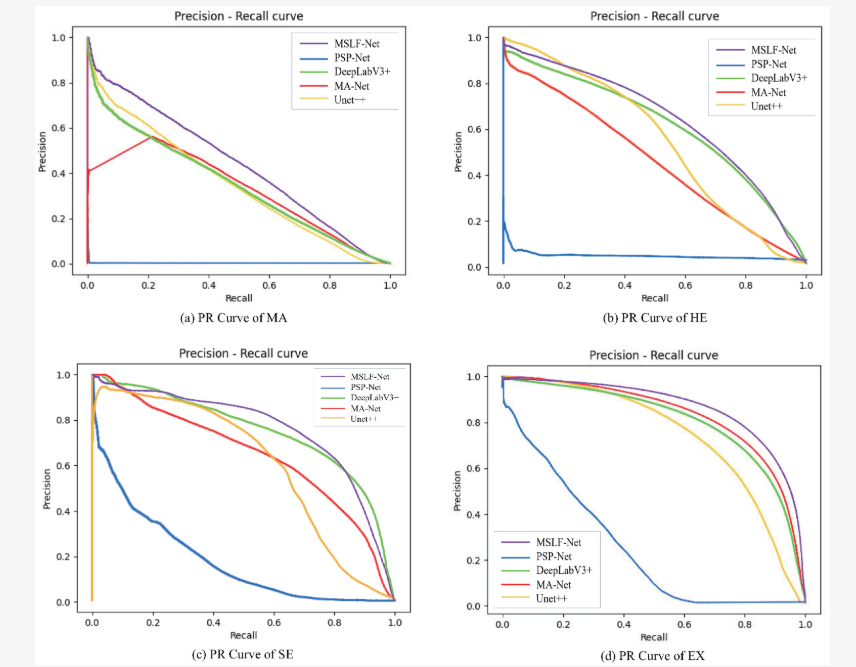

### 1. PR Curve de MA (Microaneurismas)
En Nuestro modelo, la curva Precision-Recall presentaba un sesgo significativo, con una precisión extremadamente baja en la mayoría del rango de recall.

En los modelos anteriores, se observa lo siguiente:
- **MSLF-Net (azul oscuro)** mantiene un rendimiento deficiente, similar al modelo anterior.
- **DeepLabV3+ (verde), MA-Net (rojo) y Unet++ (amarillo)** muestran una mejor compensación entre precisión y recall.

Estos resultados sugieren que los modelos En los modelos anteriores han mejorado considerablemente en la detección de microaneurismas en comparación con el modelo previo.

### 2. PR Curve de HE (Hemorragias)
En Nuestro modelo, la curva Precision-Recall estaba prácticamente pegada al eje X, lo que indica un rendimiento deficiente en la detección de hemorragias.

En los modelos anteriores:
- **PSP-Net (azul claro) y MSLF-Net (azul oscuro)** continúan mostrando un rendimiento pobre, similar al modelo previo.
- **DeepLabV3+, MA-Net y Unet++** presentan una mejor relación entre precisión y recall.

Esto sugiere que el modelo anterior probablemente tenga un rendimiento comparable a PSP-Net o MSLF-Net, lo que indica la necesidad de optimizar la arquitectura utilizada.

### 3. PR Curve de SE (Exudados Suaves)
En Nuestro modelo, la curva Precision-Recall mostraba una precisión cercana a cero en altos niveles de recall.

En los modelos anteriores:
- **DeepLabV3+ (verde) y MA-Net (rojo)** logran un mejor equilibrio entre precisión y recall.
- **MSLF-Net** sigue mostrando el peor desempeño, similar al modelo previo.

La diferencia clave radica en que, En los modelos anteriores, ciertos modelos mantienen una precisión aceptable, mientras que en la imagen anterior el modelo fallaba completamente.

### 4. PR Curve de EX (Exudados Duros)
En nuestro modelo, la precisión era prácticamente nula en casi todo el rango de recall.

En los modelos anteriores:
- **DeepLabV3+, MA-Net y Unet++** presentan una curva mucho más balanceada.
- **PSP-Net y MSLF-Net** mantienen un bajo rendimiento, similar al modelo previo.

Si el modelo anterior tiene un comportamiento comparable a PSP-Net o MSLF-Net, la transición hacia DeepLabV3+ o Unet++ representaría una mejora significativa en la detección de exudados duros.

### Conclusiones
Los resultados sugieren que modelos como **DeepLabV3+, MA-Net y Unet++** muestran un mejor rendimiento en todas las categorías analizadas. En contraste, **PSP-Net y MSLF-Net** mantienen desempeños deficientes, similares al modelo previo. Estos hallazgos refuerzan la necesidad de seleccionar arquitecturas más robustas para mejorar la detección de lesiones en retinopatía diabética.





---

# ***Conclusiones***

### **Localización usando segmentación:**

**Convergencia y Buen Comportamiento del Modelo:** La función de pérdida de entrenamiento y validación convergen hacia el mismo valor a lo largo de las épocas, lo que indica un buen ajuste y generalización del modelo sin evidencia de sobreajuste o subajuste.  

**Desempeño de Métricas:** Si bien el accuracy de entrenamiento y validación fueron similares, el valor obtenido fue bajo. Esto se debe a la naturaleza del problema multiclase, en el que se clasifican valores continuos (0, 0.5, y 1.0). La dificultad para obtener coincidencias exactas hace que el accuracy no sea una métrica adecuada para evaluar el modelo.  

**Métricas IOU y Background Distance:** Los valores del IOU tanto para la fóvea como para el disco óptico ascendieron progresivamente durante el entrenamiento y validación, con curvas bien alineadas, lo que refleja un comportamiento satisfactorio del modelo. La métrica background distance también convergió a 0, indicando una predicción precisa del color de fondo de las máscaras.  

**RMSE y MAE:**  
- En la localización del centro del **Disco Óptico**, el **RMSE (1121.53)** y el **MAE (945.35)** fueron altos, lo cual sugiere la existencia de errores notables en algunas predicciones, ya que el RMSE penaliza más los errores grandes.  
- En contraste, los errores fueron más moderados para la **Fóvea** (RMSE: 568.89; MAE: 472.49), reflejando una segmentación más precisa.  
- Es importante considerar las dimensiones de las imágenes (4288x2848 píxeles), ya que las métricas absolutas están influenciadas por esta alta resolución. Además, el análisis visual muestra que las diferencias entre las coordenadas predichas y reales no son críticas.  

**Matriz de Confusión:** Los valores más altos en la diagonal principal indican una clasificación adecuada de los píxeles, con una correcta identificación de los tonos blanco, gris y negro. La clase gris fue la mejor clasificada debido a su predominancia en las máscaras, mientras que los errores en otras clases no son relevantes, ya que el objetivo principal es segmentar las formas circulares para obtener sus centroides.  

**Limitaciones y Recomendaciones de Mejora:**
El modelo es específico para retinografías, pero existen claras oportunidades de mejora:  
- **Ampliar el número de épocas** para mejorar la precisión, dado que el problema es escalable.  
- **Incrementar la resolución** de las imágenes de entrada para capturar mejor los detalles, especialmente del Disco Óptico.  
- **Aumentar la diversidad del dataset** con retinografías de diferentes formatos y características.  
- **Implementar técnicas de postprocesamiento** para ajustar las predicciones de centroides.  
- **Aplicar aumentos de datos** para mejorar la capacidad de generalización del modelo.  

**Escalabilidad y Extensibilidad:** La metodología aplicada es extensible a problemas de segmentación en otros dominios, siempre que las formas de las máscaras no sean extremadamente complejas. Esto muestra el potencial del enfoque, con un modelo que ya tiene un desempeño sólido pero con margen para mejoras claras.


### **Análisis por estructura retiniana en Segmentación:**

1. **Segmentación del Disco Óptico:**

El modelo logró resultados aceptables en la detección del disco óptico. Sin embargo, se propone una mejora basada en el aumento de la resolución de las imágenes de entrada, lo que permitiría una mayor nitidez en los bordes y una mejor identificación de esta estructura. Adicionalmente, se recomienda incrementar el número de épocas en el entrenamiento, lo que podría permitir al modelo aprender características más detalladas del disco óptico.

2. **Segmentación de Exudados Duros:**

En la detección de exudados duros, se observó que el modelo puede beneficiarse de un aumento en la resolución de las imágenes o en el número de épocas de entrenamiento. Ambas estrategias permitirían al modelo captar con mayor precisión las características de los exudados duros, mejorando la segmentación y reduciendo posibles errores de clasificación.

3. **Segmentación de Exudados Suaves:**

Al analizar la curva de aprendizaje del coeficiente Dice, se observó que la métrica de entrenamiento alcanzó valores de 0.6 con 200 épocas, mientras que el coeficiente de validación se estabilizó en 0.3 sin mejorar significativamente. Esto indica que el modelo está funcionando, pero presenta un problema de sobreentrenamiento, lo que significa que ha aprendido demasiado bien los datos de entrenamiento y no generaliza bien a nuevos ejemplos. Para solucionar este problema, se recomienda implementar técnicas de regularización, como dropout o L2 regularization, con el fin de reducir la sobreadaptación a los datos de entrenamiento.

4. **Segmentación de Microaneurismas:**

El modelo presentó dificultades en la detección de microaneurismas debido a la baja cantidad de píxeles que representan estas estructuras en las imágenes. Para mejorar esta segmentación, se sugiere el uso de técnicas de inteligencia artificial avanzadas enfocadas en el realce de bordes y el contraste, lo que permitiría una mejor definición de los microaneurismas y facilitaría su identificación por parte del modelo.

5. **Segmentación de Hemorragias:**

Si bien el modelo logró identificar algunas hemorragias, en varios casos estas fueron confundidas con venas y arterias, lo que afectó la precisión de la segmentación. Para solucionar este problema, se propone la creación de una máscara detallada de venas y arterias, de manera que la IA pueda aprender a diferenciarlas de las hemorragias. Entrenar el modelo con esta información adicional permitiría mejorar la segmentación, reduciendo los falsos positivos y mejorando la especificidad en la detección de hemorragias.

<br>

***Conclusiones generales en segmentación:***
1. La implementación de la arquitectura Attention U-Net mostró resultados prometedores en la segmentación de estructuras retinianas, facilitando la identificación de regiones de interés, como exudados, microaneurismas y hemorragias. Esta arquitectura demostró ser adecuada para abordar la complejidad de las imágenes médicas gracias a sus mecanismos de atención que optimizan el enfoque en características sutiles. Además, el modelo es escalable a otros conjuntos de datos y problemas similares gracias a su estructura adaptable y a las técnicas utilizadas. Sin embargo, es fundamental gestionar los falsos positivos y negativos, especialmente en la identificación de microaneurismas y hemorragias, para asegurar que el modelo mantenga su eficacia en diversas aplicaciones clínicas.

2. A pesar del rendimiento aceptable en la detección de algunas estructuras, el modelo enfrentó dificultades en la segmentación de características pequeñas y dispersas, como microaneurismas y hemorragias. La escasa representación de estas estructuras en los píxeles de las imágenes contribuyó a un aumento en los falsos negativos, lo que resalta la necesidad de estrategias de mejora para abordar estos problemas en futuros entrenamientos.


3. La aplicación de técnicas de aumento de datos proporcionó una mayor diversidad en las imágenes de entrenamiento, lo que es crucial para mejorar la capacidad de generalización del modelo. Sin embargo, es evidente que un conjunto de datos más amplio y representativo podría potenciar aún más la precisión en la segmentación.

4. Las métricas utilizadas para evaluar el rendimiento del modelo, como el Dice Coefficient, evidenciaron la calidad de la segmentación comparando las predicciones con las máscaras reales. Las curvas ROC y PR también ofrecieron una buena visualización de la capacidad del modelo para discriminar entre las clases.


5. Para optimizar el rendimiento en la segmentación, se sugiere explorar el uso de técnicas avanzadas como el aprendizaje por transferencia, la generación de datos sintéticos mediante GANs, y la implementación de estrategias de reescalado inteligente para enfatizar áreas clave en las imágenes. Además, se deben considerar ajustes en la arquitectura del modelo y en el proceso de entrenamiento para mejorar la detección de características críticas.



---
# **Referencias**

Para el desarrollo de este trabajo, se utilizó ChatGPT, un modelo de lenguaje basado en la arquitectura GPT (Generative Pre-trained Transformer), desarrollado por OpenAI. La versión específica empleada es ChatGPT-4, que tiene capacidades avanzadas para entender y generar texto en lenguaje natural, así como para escribir, depurar y mejorar código en diversos lenguajes de programación.

Este modelo fue entrenado con grandes cantidades de datos textuales, lo que le permite comprender el contexto, razonar sobre problemas técnicos y proponer soluciones programáticas. Sus capacidades incluyen la comprensión semántica de consultas y la generación de respuestas relevantes en función del contenido solicitado.

### Tipos de Prompts Utilizados  

Para el desarrollo de los códigos y soluciones propuestas, se utilizaron los siguientes tipos de prompts:  

1. **Desarrollo de Algoritmos y Funcionalidades:**  
   Prompts detallados que describían el problema a resolver y las especificaciones del algoritmo deseado.

2. **Depuración y Optimización:**  
   Se solicitaron mejoras y depuraciones en códigos previamente escritos, especificando errores o aspectos a mejorar.    

3. **Explicación de Código:**  
   Peticiones para que el modelo explicara el funcionamiento de bloques de código.  

4. **Generación de Referencias y Documentación:**  
   Consultas sobre cómo estructurar bibliografía y documentación técnica.  

5. **Revisión de Resultados y Métricas:**  
   Solicitudes para analizar y redactar conclusiones a partir de resultados de métricas de entrenamiento y validación.  

[1] IEEE DataPort, "Indian Diabetic Retinopathy Image Dataset (IDRiD)," 2023. [Enlace] https://ieee-dataport.org/open-access/indian-diabetic-retinopathy-image-dataset-idrid

[2] Centro Universitario de Navarra, "Retinografía," s.f. [Enlace] https://www.cun.es/diccionario-medico/terminos/retinografia

[3] Instituto de Microcirugía Ocular, "Pruebas diagnósticas: Retinografía," s.f. [Enlace] https://www.imo.es/pruebas-diagnosticas/retinografia/

[4] Wikipedia, "Retinografía," s.f. [Enlace] https://es.wikipedia.org/wiki/Retinograf%C3%ADa

[5] Centro de Retina y Vítreo, "Retinografía," s.f. [Enlace] https://icrcat.com/tratamientos-pruebas/retinografia-2/

[6] Central Ocular, "¿Qué es una retinografía?," s.f. [Enlace] https://www.centralocular.com/que-es-una-retinografia-cuando-esta-indicada-diferencias-con-angiografia/

[7] C. Coro y C. Coro, "Prueba oftálmica: ¿para qué hacemos la retinografía?," Clínica Coro, 6 ago. 2021. [Enlace] https://clinicacoro.es/retinografia/

[8] OpenAI. (2025). ChatGPT (Febrero 2025 versión). Recuperado de https://chat.openai.com

[9] Viso. (s.f.). U-Net: A Comprehensive Guide to its Architecture and Applications. Recuperado de https://viso.ai/deep-learning/u-net-a-comprehensive-guide-to-its-architecture-and-applications/

[10] Xia, T., Liu, Y., Wang, Y., Xu, H., & Meng, L. (2019). Attention U-Net: Learning Where to Look for the Pancreas. arXiv. https://arxiv.org/pdf/1902.04049

[11] Autor desconocido. (s.f.). U-Net with the attention mechanisms structure. ResearchGate. Recuperado de https://www.researchgate.net/figure/U-Net-with-the-attention-mechanisms-structure-34-The-encoder-performs-4-downsampling_fig3_349831785

[12] Oktay, O., Schlemper, J., Folgoc, L. L., Lee, M., Heinrich, M., Misawa, K., Mori, K., McDonagh, S., Hammerla, N. Y., Kainz, B., Glocker, B., & Rueckert, D. (2018). Attention U-Net: Learning Where to Look for the Pancreas. arXiv. https://arxiv.org/abs/1804.03999

[13] TechTarget, "Types of learning in machine learning explained," s.f. [Enlace] https://www.techtarget.com/searchenterpriseai/tip/Types-of-learning-in-machine-learning-explained

[14] IBM, "AI Model," s.f. [Enlace] https://www.ibm.com/think/topics/ai-model

[15] ISO, "Artificial Intelligence: Machine Learning," s.f. [Enlace] https://www.iso.org/artificial-intelligence/machine-learning

[16] Chowdhury, N. K., Rahman, M. M., & Khandakar, A. (2022). Attention U-Net for automatic COVID-19 infection detection from chest CT images. Diagnostics, 12(12), 2918. https://doi.org/10.3390/diagnostics12122918

[17] Foqum. (s.f.). ¿Qué es Accuracy o Exactitud?. Recuperado de https://foqum.io/blog/termino/accuracy-exactitud/

[18] James, G., Witten, D., Hastie, T., & Tibshirani, R. (2013). An Introduction to Statistical Learning: With Applications in R. Springer.

[19] Willmott, C. J., & Matsuura, K. (2005). Advantages of the mean absolute error (MAE) over the root mean square error (RMSE) in assessing average model performance. Climate Research, 30(1), 79-82. https://doi.org/10.3354/cr030079

[20] "Manejo de clases desbalanceadas con weighted loss en PyTorch." Naadi Speaks. https://naadispeaks.blog/2021/07/31/handling-imbalanced-classes-with-weighted-loss-in-pytorch/.

[21] A. Vilches, "Cómo mejorar el desempeño de una red neuronal para cuando hay clases desbalanceadas." LinkedIn. https://es.linkedin.com/pulse/c%C3%B3mo-mejorar-el-desempe%C3%B1o-de-una-red-neuronal-para-cuando-vilches.

[22] J. Barrios, "Clases desbalanceadas." https://www.juanbarrios.com/clases-desbalanceadas/.

[23] "Peso en redes neuronales." Foqum. https://foqum.io/blog/termino/peso/.

[24] O. Ronneberger, P. Fischer, y T. Brox, "U-net: Convolutional networks for biomedical image segmentation," en *Medical image computing and computer-assisted intervention–MICCAI 2015: 18th international conference, Munich, Germany, October 5-9, 2015, proceedings, part III 18*, Springer International Publishing, 2015, pp. 234-241.

[25] O. Oktay, J. Schlemper, L. L. Folgoc, M. Lee, M. Heinrich, K. Misawa, et al., "Attention U-Net: Learning where to look for the pancreas," arXiv preprint arXiv:1804.03999, 2018.

[26] R. Shanmugamani, *Deep Learning for Computer Vision: Expert techniques to train advanced neural networks using TensorFlow and Keras*, Packt Publishing Ltd., 2018.

[27] HighBond, "Dice Coefficient." [Enlace] https://help.highbond.com/helpdocs/analytics/141/scripting-guide/en-us/Content/lang_ref/functions/r_dicecoefficient.htm

[28] Wikipedia, "Sørensen–Dice Coefficient." [Enlace] https://en.wikipedia.org/wiki/S%C3%B8rensen%E2%80%93Dice_coefficient

[29] PMC, "Evaluation Metrics." [Enlace] https://pmc.ncbi.nlm.nih.gov/articles/PMC1415224/

[30] Wikipedia, "Machine learning." [Enlace] https://en.wikipedia.org/wiki/Machine_learning

[31] AWS, "What is Data Augmentation?" [Enlace] https://aws.amazon.com/what-is/data-augmentation/

[32] IBM, "Data Augmentation." [Enlace] https://www.ibm.com/think/topics/data-augmentation

[33] AIMultiple, "Data Augmentation." [Enlace] https://research.aimultiple.com/data-augmentation/

[34] I. Goodfellow et al., "Generative Adversarial Networks," arXiv preprint arXiv:1406.2661, 2014.

[35] L. Chen et al., "Scalable Learning of Collective Behavior," IEEE Transactions on Knowledge and Data Engineering, vol. 24, no. 6, pp. 1080-1091, Jun. 2012.



---

# ***Anexos***
- Documentación: https://github.com/Andres-Ria/Documentaci-n-Proyecto-Final/blob/main/Documentacion_Final.ipynb



---

